<H1> Projeto 1: Análise de Vendas de Uma Loja

* Objetivo: Analisar os dados de vendas de uma loja para identificar padrões e insights.
* Tarefas:
   * 1. Importação de Dados: Carregar o conjunto de dados de vendas a partir de um arquivo CSV.
   * 2. Limpeza de Dados: Tratar valores ausentes, corrigir tipos de dados e remover duplicatas.
   * 3. Análise Exploratória:
        * ◦ Calcular as vendas totais por mês de cada ano.
        * ◦ Identificar os departamentos que mais venderam.       
        * ◦ Analisar as vendas por categoria de produto.
   * 4. Visualização de Dados: Criar gráficos para visualizar as vendas ao longo do tempo, vendas por categoria e produtos mais vendidos.
    
* Ferramentas e Bibliotecas: Pandas, Matplotlib/Seaborn.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
df = pd.read_csv('department_store_dataset.csv')
df.head(10)

,Seller,Department,Revenue,Revenue Goal,Margin,Margin Goal,Date,Sales Quantity,Customers
0,Letícia Nascimento,Eletrônicos,6139.41,1857.66,0.14,0.18,2017-01-01,50,213
1,Ana Sousa,Eletrônicos,7044.96,5236.01,0.30,0.17,2017-01-01,52,256
2,Gustavo Martins,Eletrônicos,4109.85,1882.47,0.14,0.20,2017-01-01,33,189
3,Beatriz Santos,Vestuário,315.30,2069.08,0.20,0.17,2017-01-01,2,6
4,Camila Lima,Vestuário,1672.33,3587.07,0.24,0.14,2017-01-01,12,50
5,Thiago Barbosa,Acessórios,2884.52,2005.19,0.40,0.44,2017-01-01,23,48
6,Letícia Ribeiro,Acessórios,3414.28,1302.34,0.26,0.42,2017-01-01,30,66
7,Enzo Nascimento,Casa,9427.77,5667.34,0.37,0.30,2017-01-01,82,186
8,Guilherme Santos,Casa,6039.19,7901.41,0.23,0.29,2017-01-01,42,85
9,Vitória Ribeiro,Brinquedo,6593.46,4112.01,0.36,0.26,2017-01-01,59,240


In [13]:
df.info

<bound method DataFrame.info of                    Seller   Department  Revenue  Revenue Goal  Margin  \
0      Letícia Nascimento  Eletrônicos  6139.41       1857.66    0.14   
1               Ana Sousa  Eletrônicos  7044.96       5236.01    0.30   
2         Gustavo Martins  Eletrônicos  4109.85       1882.47    0.14   
3          Beatriz Santos    Vestuário   315.30       2069.08    0.20   
4             Camila Lima    Vestuário  1672.33       3587.07    0.24   
...                   ...          ...      ...           ...     ...   
41624     Camila Carvalho         Casa  1515.27       3472.65    0.22   
41625       Diego Cardoso    Vestuário  1988.60       1860.28    0.15   
41626        Jorge Santos    Brinquedo  2408.98       1392.15    0.29   
41627       Raphael Silva    Papelaria  1414.54        298.84    0.34   
41628       Caroline Reis    Papelaria  1495.06        850.31    0.34   

       Margin Goal        Date  Sales Quantity  Customers  
0             0.18  2017-01-01 

<h3> Limpeza de Dados: Tratar valores ausentes, corrigir tipos de dados e remover duplicatas. <h3>

In [16]:
df_faltantes = df.isnull().sum()
print(df_faltantes)

Seller            0
Department        0
Revenue           0
Revenue Goal      0
Margin            0
Margin Goal       0
Date              0
Sales Quantity    0
Customers         0
dtype: int64


In [24]:
df.dtypes

Seller             object
Department         object
Revenue           float64
Revenue Goal      float64
Margin            float64
Margin Goal       float64
Date               object
Sales Quantity      int64
Customers           int64
dtype: object

In [27]:
df.describe(include='all')

,Seller,Department,Revenue,Revenue Goal,Margin,Margin Goal,Date,Sales Quantity,Customers
count,41629,41629,41629.000000,41629.000000,41629.000000,41629.000000,41629,41629.000000,41629.000000
unique,19,7,NaN,NaN,NaN,NaN,2191,NaN,NaN
top,Letícia Nascimento,Eletrônicos,NaN,NaN,NaN,NaN,2017-01-01,NaN,NaN
freq,2191,8764,NaN,NaN,NaN,NaN,19,NaN,NaN
mean,NaN,NaN,4304.522655,4458.557065,0.279164,0.291039,NaN,33.368950,126.298878
std,NaN,NaN,4158.522015,3258.360518,0.150589,0.113495,NaN,30.885202,123.439971
min,NaN,NaN,0.000000,241.010000,0.028000,0.140000,NaN,0.000000,0.000000
25%,NaN,NaN,1239.000000,1980.560000,0.170000,0.200000,NaN,10.000000,36.000000
50%,NaN,NaN,2934.710000,3472.410000,0.250000,0.260000,NaN,24.000000,89.000000
75%,NaN,NaN,6110.730000,6269.260000,0.350000,0.360000,NaN,47.000000,179.000000


In [18]:
duplicatas = df.duplicated()
print(duplicatas.sum())

0


<h3> Análise Exploratória: Calcular as vendas totais por mês de cada ano. <h3>

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Ano_mes'] = df['Date'].dt.to_period('M')

vendas_totais_por_mes = df.groupby('Ano_mes')['Revenue'].sum().reset_index()
pd.set_option('display.max_rows', df.shape[0])
vendas_totais_por_mes

,Ano_mes,Revenue
0,2017-01,2403759.79
1,2017-02,2185182.58
2,2017-03,2324774.47
3,2017-04,2325890.58
4,2017-05,2311906.61
5,2017-06,2494934.71
6,2017-07,2552317.83
7,2017-08,2370250.47
8,2017-09,2319065.98
9,2017-10,2270723.02


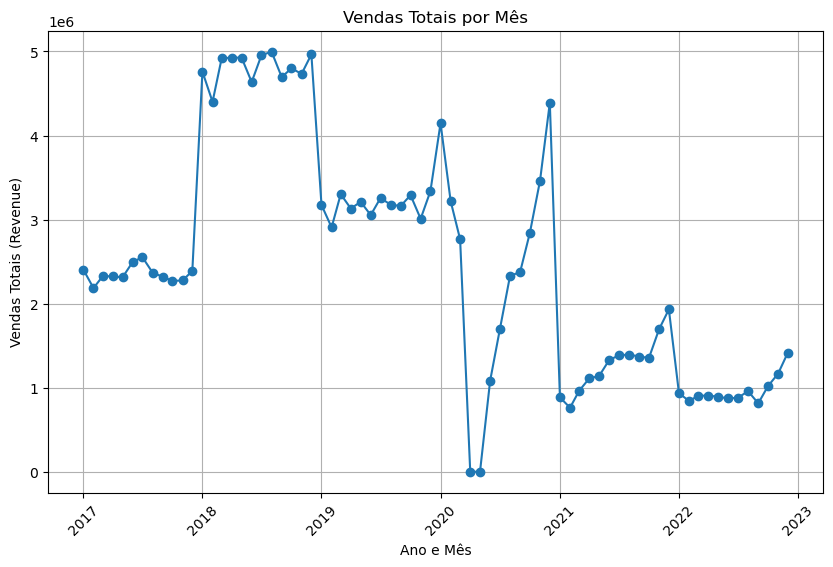

In [44]:
vendas_totais_por_mes['Ano_mes'] = vendas_totais_por_mes['Ano_mes'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(vendas_totais_por_mes['Ano_mes'], vendas_totais_por_mes['Revenue'], marker='o', linestyle='-')
plt.xlabel('Ano e Mês')
plt.ylabel('Vendas Totais (Revenue)')
plt.title('Vendas Totais por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h3>  Identificar os departamentos que mais venderam. <h3>

In [41]:
vendas_por_departamento = df.groupby('Department')['Sales Quantity'].sum().reset_index()
vendas_por_departamento = vendas_por_departamento.sort_values(by='Sales Quantity', ascending=False)
vendas_por_departamento

,Department,Sales Quantity
3,Eletrônicos,349304
2,Casa,313553
4,Esportes,288992
6,Vestuário,188493
1,Brinquedo,141508
0,Acessórios,61668
5,Papelaria,45598


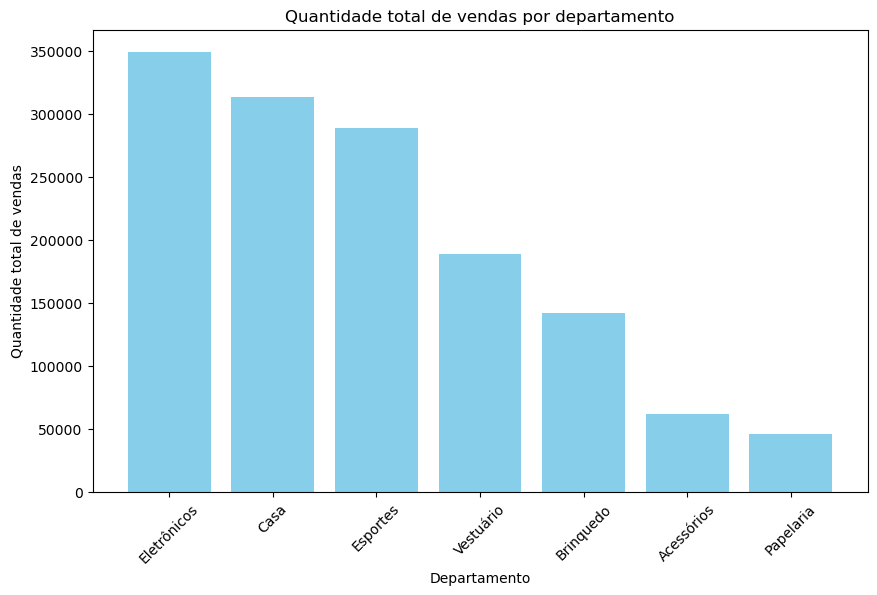

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(vendas_por_departamento['Department'], vendas_por_departamento['Sales Quantity'], color='skyblue')
plt.xlabel('Departamento')
plt.ylabel('Quantidade total de vendas')
plt.title('Quantidade total de vendas por departamento')
plt.xticks(rotation=45)
plt.show()

<h3>Insight<h3>

A análise das vendas totais por departamento ao longo do período revelou que o setor de eletrônicos foi consistentemente o que mais vendeu. Isso demonstra uma alta demanda e preferência dos consumidores por produtos eletrônicos, indicando a importância estratégica desse setor para a empresa.

Adicionalmente, ao segmentar as vendas totais por mês, observamos que o período de 2018 a 2019 foi o mais próspero em termos de receita. Essa informação é crucial para entender o comportamento do mercado e planejar ações futuras. Durante esse período, as vendas atingiram picos significativos, possivelmente devido a campanhas promocionais, lançamentos de novos produtos ou sazonalidades específicas que impulsionaram as compras.

A combinação desses insights sugere que investir em estratégias de marketing e promoção focadas no setor de eletrônicos pode ser altamente benéfico para maximizar as receitas. Além disso, é recomendável analisar em detalhe os fatores que contribuíram para o aumento das vendas entre 2018 e 2019 para replicar essas práticas de sucesso em futuros períodos.